In [89]:
import os
import urllib.request
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from sklearn.metrics import confusion_matrix  , classification_report ,accuracy_score
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn import metrics

from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.metrics import auc

Until now we have: 
   - 208 Cataracts. 175 from previous set and 33 from latest set 
   - 322 Healthy. 200 from previous set and 122 from latest set

In [90]:
path = '/home/khaldoun/Desktop/TOV_DataAcquisition/Datasets/UNHAS'

# path = 'Datasets\\UNHAS'
filename='UnhasImagesCataractsCropped.csv'
filename2='UnhasImagesHealthyCropped.csv'
csv_path=os.path.join(path,filename)
csv_path2=os.path.join(path,filename2)
df_cataracts = pd.read_csv(csv_path)
df_healthy = pd.read_csv(csv_path2)

In [91]:
print(df_cataracts.head())
print(df_healthy.head())

       folder                                        filename  height  width  \
0  17-03-2021      WhatsApp Image 2021-03-17 at 08.28.40.jpeg    1280    988   
1  17-03-2021  WhatsApp Image 2021-03-17 at 08.16.08 (1).jpeg     984   1045   
2  17-03-2021      WhatsApp Image 2021-03-17 at 08.28.38.jpeg     227    324   
3  17-03-2021  WhatsApp Image 2021-03-17 at 08.16.12 (1).jpeg     270    300   
4  17-03-2021      WhatsApp Image 2021-03-24 at 11.53.24.jpeg     992   1280   

   bands  filesize(KB)  
0      3       161.712  
1      3       550.775  
2      3        42.335  
3      3        50.687  
4      3       130.944  
          folder                                        filename  height  \
0  Koass unismuh      WhatsApp Image 2021-03-20 at 08.33.13.jpeg     978   
1  Koass unismuh  WhatsApp Image 2021-03-23 at 12.10.21 (2).jpeg     914   
2  Koass unismuh      WhatsApp Image 2021-03-24 at 10.39.05.jpeg    1016   
3  Koass unismuh      WhatsApp Image 2021-03-24 at 15.34.55.jpeg 

In [92]:
#Reading cataract images
cat_images = []
noread = []
path_cat_images=os.path.join(path,'UnhasImagesCataractsCropped')
file_names = df_cataracts.filename
row=100
col=100

for image_name in tqdm(file_names):
    try:
        image = cv2.imread(os.path.join(path_cat_images,image_name))
        image = cv2.resize(image,(row,col))
        cat_images.append(image)
    except:
        noread.append(image_name)
        continue

cat_images = np.array(cat_images)
noread = np.array(noread)

100%|██████████| 208/208 [00:00<00:00, 335.55it/s]


In [93]:
cat_images.shape

(206, 100, 100, 3)

In [94]:
#Reading healthy images
healthy_images = []
noread = []
path_cat_images=os.path.join(path,'UnhasImagesHealthyCropped')
file_names = df_healthy.filename

for image_name in tqdm(file_names):
    try:
        image = cv2.imread(os.path.join(path_cat_images,image_name))
        image = cv2.resize(image,(row,col))
        healthy_images.append(image)
    except:
        noread.append(image_name)
        continue
        
healthy_images = np.array(healthy_images)
noread = np.array(noread)

100%|██████████| 322/322 [00:01<00:00, 172.19it/s]


In [95]:
healthy_images.shape

(322, 100, 100, 3)

# Prepare Data for Machine Learning|


In [96]:
cat_images.shape

(206, 100, 100, 3)

In [97]:
import matplotlib.pyplot as plt
import pandas as pd 


images = []
labels = []

for i , d in enumerate(cat_images):
    images.append(d)
    labels.append(1)
for i , d in enumerate(healthy_images):
    images.append(d)
    labels.append(0)  
    
Images = np.array(images)
Labels = np.array(labels)

1


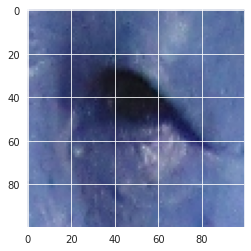

1


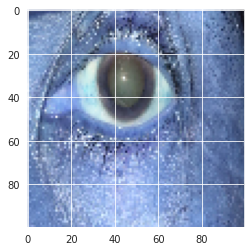

0


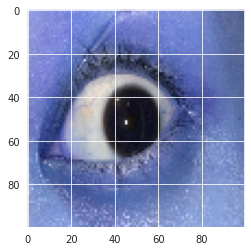

1


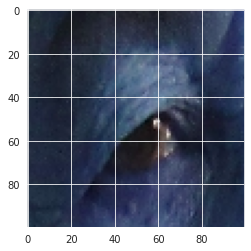

0


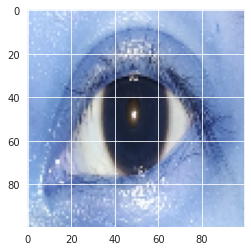

0


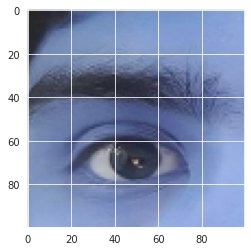

0


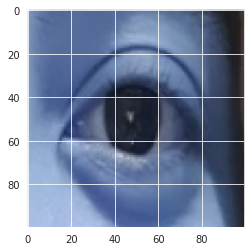

1


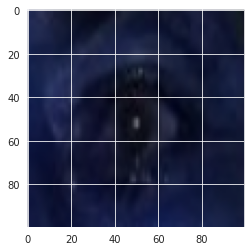

0


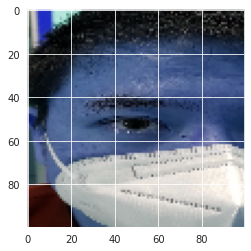

0


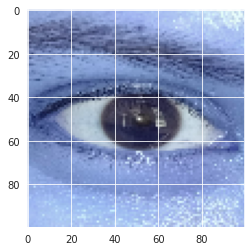

In [98]:
import random 
for i in range(10):
    n = random.randint(0, len(labels))
    plt.imshow(images[n])
    print(labels[n])
    plt.show()
    

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.33, shuffle = True, random_state = 1)

pd.DataFrame(y_train).value_counts()

0    212
1    141
dtype: int64

In [105]:
from random import sample
#prepare training data by sampling 
temp = []
for idx, label in enumerate(y_train):
    if label == 0:
        temp.append(idx)

temp = sample(temp, len([label for label in y_train if label == 1]))

X_data = []
y_data = []

for idx in temp:
    X_data.append(X_train[idx])
    y_data.append(y_train[idx])

temp = []
for idx, label in enumerate(y_train):
    if label == 1:
        temp.append(idx)
        
for idx in temp:
    X_data.append(X_train[idx])
    y_data.append(y_train[idx])

X_train = np.array(X_data)
y_train = np.array(y_data)


print(X_train.shape, y_train.shape)

pd.DataFrame(y_train).value_counts()

(282, 100, 100, 3) (282,)


1    141
0    141
dtype: int64

In [101]:
temp = []
for idx, label in enumerate(y_test):
    if label == 0:
        temp.append(idx)

temp = sample(temp, len([label for label in y_test if label == 0]))

X_data = []
y_data = []

for idx in temp:
    X_data.append(X_test[idx])
    y_data.append(y_test[idx])

temp = []
for idx, label in enumerate(y_test):
    if label == 1:
        temp.append(idx)
        
for idx in temp:
    X_data.append(X_test[idx])
    y_data.append(y_test[idx])

X_test = np.array(X_data)
y_test= np.array(y_data)


print(X_test.shape, y_test.shape)

pd.DataFrame(y_test).value_counts()

(175, 100, 100, 3) (175,)


0    110
1     65
dtype: int64

In [102]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import load_model
import tensorflow as tf


save_dir = './saved_models'
model_name = 'k.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)



In [74]:
def Creat_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(row, col, 3)))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(BatchNormalization())
    model.add(layers.Dense(64))
    model.add(BatchNormalization())
    model.add(layers.Dense(1 , activation='sigmoid'))

    opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
    model.compile(optimizer=opt, loss = 'mse',metrics=['accuracy' ])
    return model 


In [16]:
def Train( model , X_train , y_train  , epochs = 20 , name = 'Name' , X_test = X_test , y_test = y_test ):
    
#     checkpoints = ModelCheckpoint(model_path, save_best_only=True)
    history = model.fit(X_train, y_train, epochs=epochs  , validation_data=(X_test, y_test))
    
    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
    model.save(model_path)
    os.rename(model_path, os.path.join(save_dir, f"{name}-{int(test_acc*100)}.h5"))
    
    return history
    

Epoch 1/20
9/9 [==============================] - 2s 221ms/step - loss: 0.1380 - accuracy: 0.8121 - val_loss: 0.4830 - val_accuracy: 0.5000
Epoch 2/20
9/9 [==============================] - 2s 200ms/step - loss: 0.0527 - accuracy: 0.9326 - val_loss: 0.3791 - val_accuracy: 0.6077
Epoch 3/20
9/9 [==============================] - 2s 213ms/step - loss: 0.0300 - accuracy: 0.9681 - val_loss: 0.0954 - val_accuracy: 0.8769
Epoch 4/20
9/9 [==============================] - 2s 209ms/step - loss: 0.0282 - accuracy: 0.9716 - val_loss: 0.2008 - val_accuracy: 0.7308
Epoch 5/20
9/9 [==============================] - 2s 208ms/step - loss: 0.0197 - accuracy: 0.9787 - val_loss: 0.1581 - val_accuracy: 0.7615
Epoch 6/20
9/9 [==============================] - 2s 223ms/step - loss: 0.0107 - accuracy: 0.9894 - val_loss: 0.1179 - val_accuracy: 0.8692
Epoch 7/20
9/9 [==============================] - 2s 209ms/step - loss: 0.0249 - accuracy: 0.9716 - val_loss: 0.0669 - val_accuracy: 0.9231
Epoch 8/20
9/9 [====

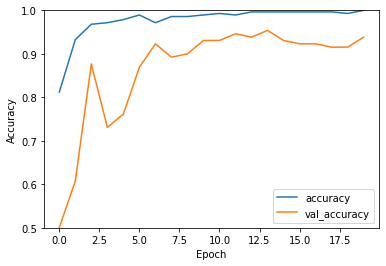

In [17]:


model = Creat_model()
history = Train(model , X_train , y_train , name = '1st_crop_')


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [55]:
pd.DataFrame(y_test).value_counts()

1    65
0    65
dtype: int64

In [56]:
test_loss, test_acc = model.evaluate(Images,  Labels, verbose=2)

17/17 - 1s - loss: 0.0186 - accuracy: 0.9754


In [57]:
y_pred = model.predict(X_test)

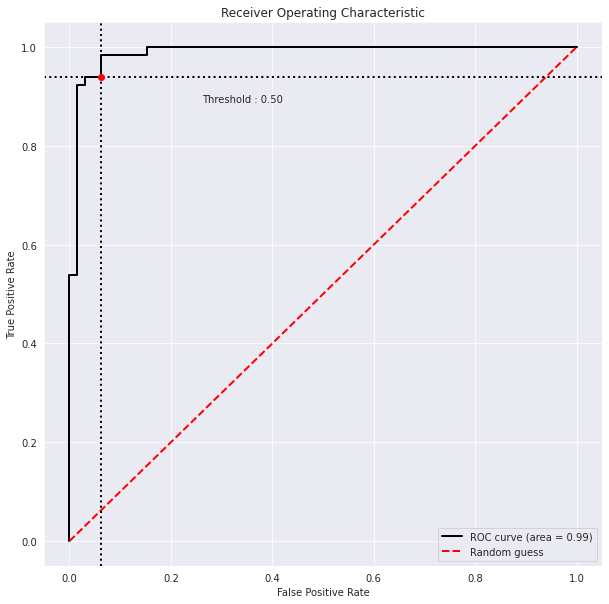

In [58]:
from plot_metric.functions import BinaryClassification

y_pred = model.predict(X_test)
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

In [66]:
df = pd.DataFrame(model.predict(X_test))
threshold = 0.39361852
df[df < threshold] = 0
df[df > threshold] = 1
y_pred = df 

In [67]:
#generate classification model
print("Classification report for classifier %s:\n%s\n"
      % (model, metrics.classification_report(y_test, y_pred.astype(int))))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, y_pred.astype(int)))

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f917fbbcd90>:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        65
           1       0.94      0.97      0.95        65

    accuracy                           0.95       130
   macro avg       0.95      0.95      0.95       130
weighted avg       0.95      0.95      0.95       130


Confusion matrix:
[[61  4]
 [ 2 63]]


<AxesSubplot:>

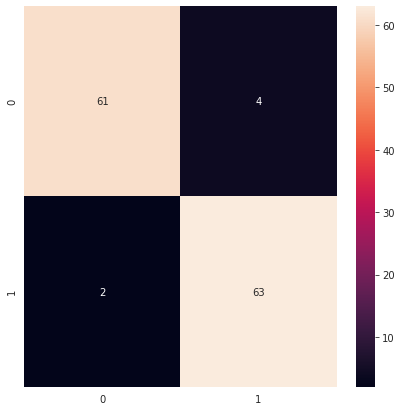

In [68]:

plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test, y_pred.astype(int)) , annot=True , fmt='d') 

[0.         0.01538462 0.53846154 0.53846154 0.92307692 0.92307692
 0.93846154 0.93846154 0.98461538 0.98461538 1.         1.
 1.         1.        ]
[0.         0.         0.         0.01538462 0.01538462 0.03076923
 0.03076923 0.06153846 0.06153846 0.15384615 0.15384615 0.63076923
 0.66153846 1.        ]
[1.9998760e+00 9.9987602e-01 9.7861528e-01 9.7639787e-01 8.2623929e-01
 7.4133766e-01 7.3613727e-01 5.2461118e-01 3.9361852e-01 1.8872979e-01
 1.8730232e-01 7.3659420e-03 4.3413937e-03 9.8827979e-05]
0.9884023668639054
Threshold value is: 0.39361852


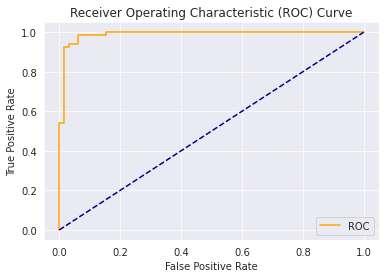

In [69]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

y_true = y_test
y_scores = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

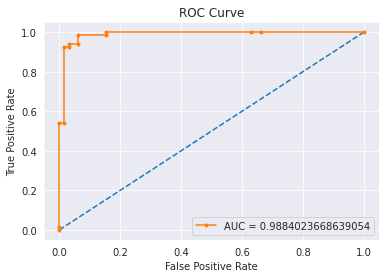

In [70]:
y_pred = model.predict(X_test)
false_pos_rate, true_pos_rate, proba = roc_curve(y_test, y_pred[:, -1])
plt.figure()
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".", label=f"AUC = {roc_auc_score(y_test, y_pred[:, -1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

In [71]:
optimal_proba_cutoff = sorted(list(zip(np.abs(true_pos_rate - false_pos_rate), proba)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in y_pred[:, -1]]
optimal_proba_cutoff

0.39361852